In [1]:
from scipy.special import expit
from imldiff.comparers import DifferenceComparer, AbsoluteDifferenceComparer, SumComparer, SimilarityComparer, \
    DissimilarityComparer, ZeroClippedDifferenceComparer
from imldiff.models import Classifier
from imldiff.plots import plot_decision_boundaries_and_distributions, plot_shap_value_distribution, \
    plot_shap_partial_dependence, plot_shap_values_stacked, plot_shap_values_hierarchically_clustered
from imldiff.explainers import SHAPExplainer, make_shap_explainer
from imldiff.util import printmd
import shap
import numpy as np
%matplotlib inline
shap.initjs()
notebook_name = 'Move Soft Decision Boundary'
printmd(f'# {notebook_name}')

# Move Soft Decision Boundary

## Create Models

In [2]:
feature_names = ['x1', 'x2']
offset = 0.1
scale = 10

class LeftShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([expit((x[0] - offset/2) * scale) for x in X])

class RightShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([expit((x[0] + offset/2) * scale) for x in X])

classifiers = [LeftShiftedClassifier(), RightShiftedClassifier()]

In [3]:
number_of_samples = 1000
X = np.random.uniform(-1, 1, (number_of_samples, len(feature_names)))

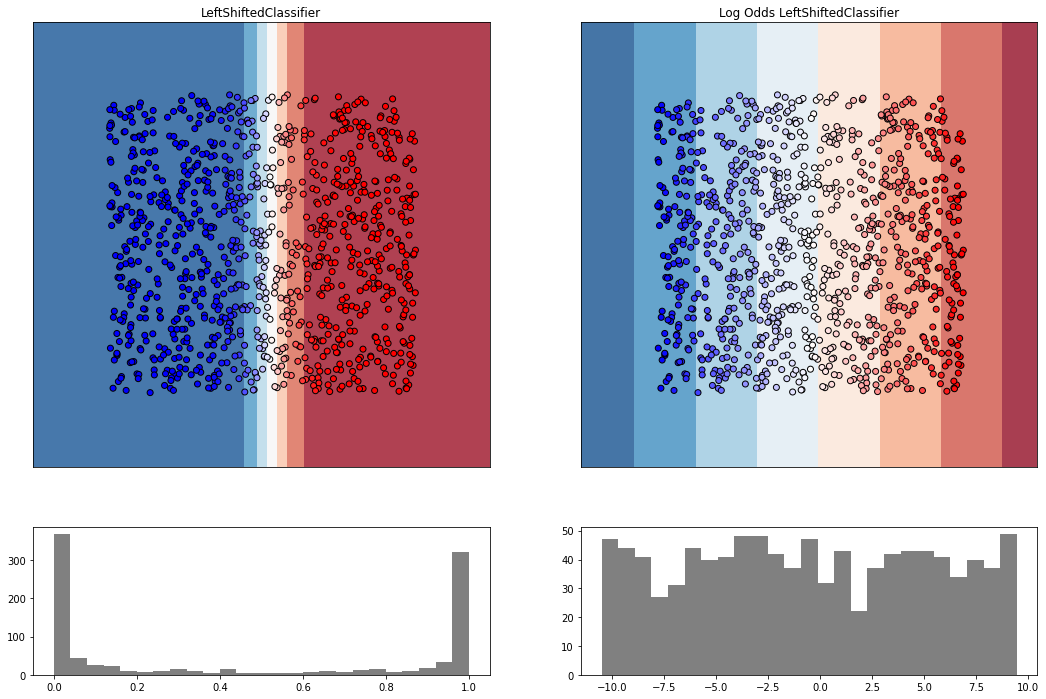

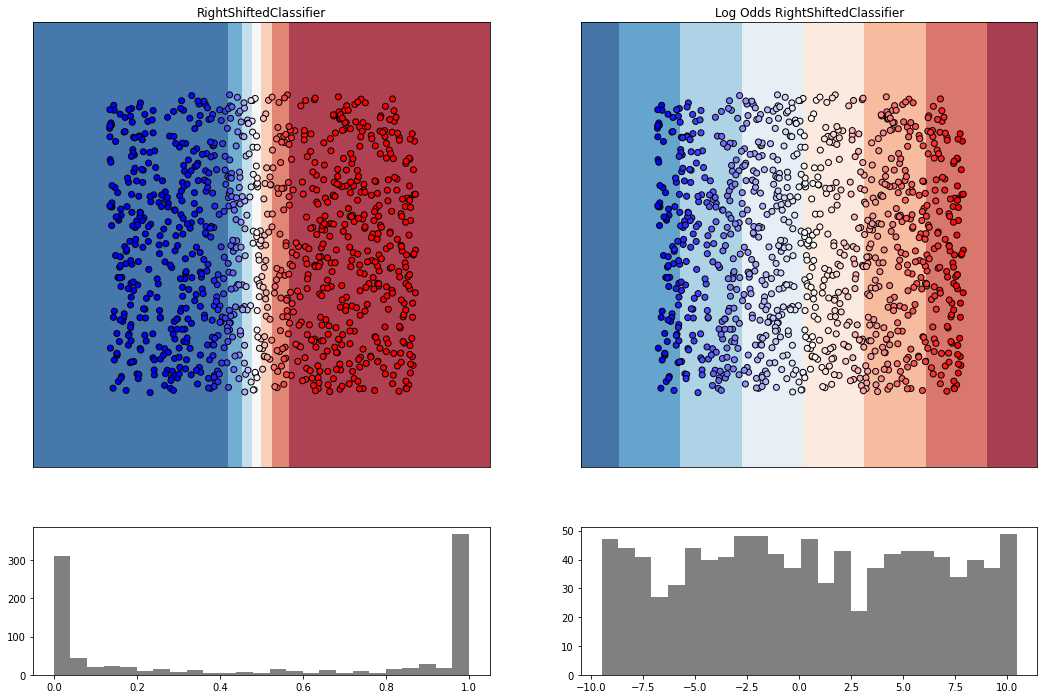

In [4]:
for classifier in classifiers:
    plot_decision_boundaries_and_distributions(classifier, X)

In [5]:
comparers = [
    DifferenceComparer(*classifiers),
    AbsoluteDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*reversed(classifiers)),
    SumComparer(*classifiers),
    SimilarityComparer(*classifiers),
    DissimilarityComparer(*classifiers),
    DissimilarityComparer(*reversed(classifiers))
]

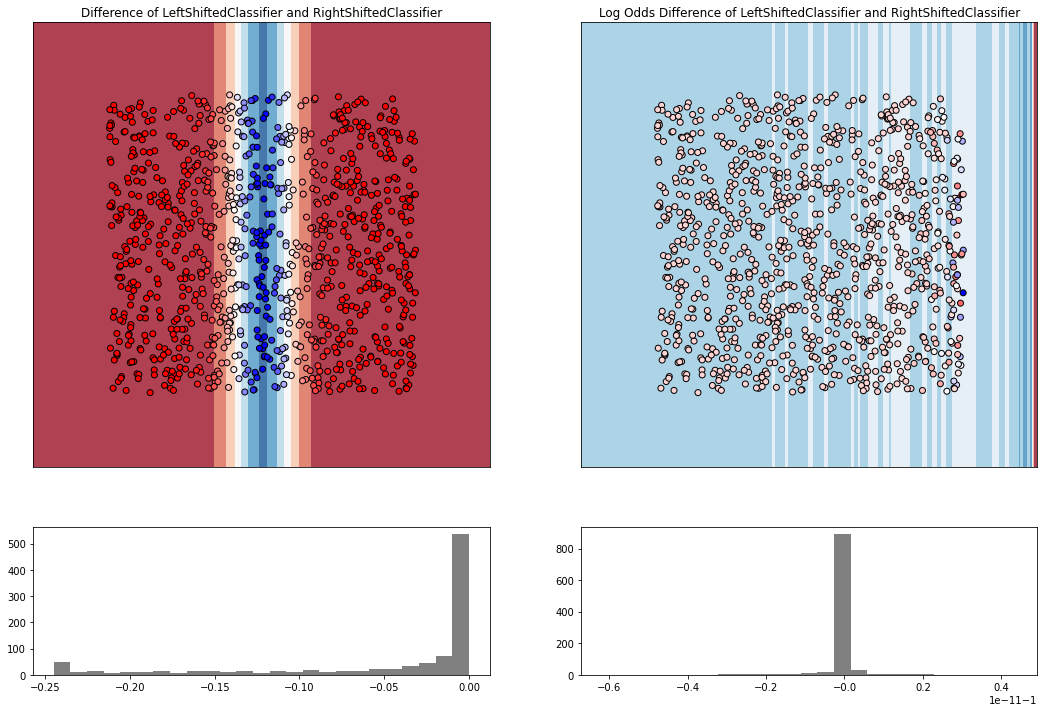

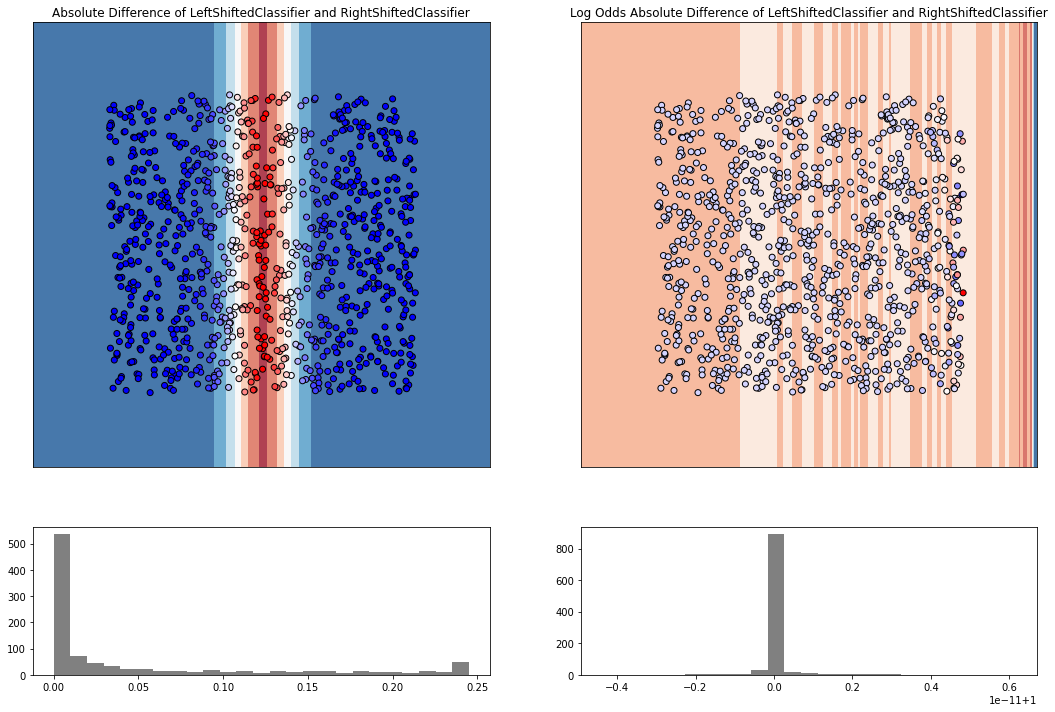

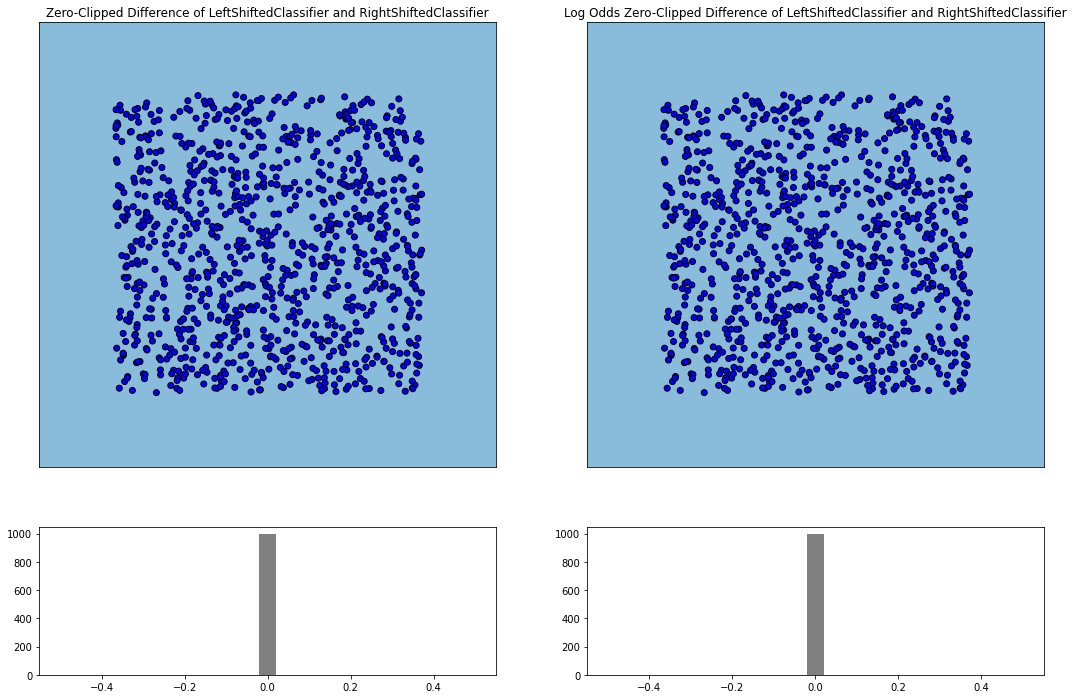

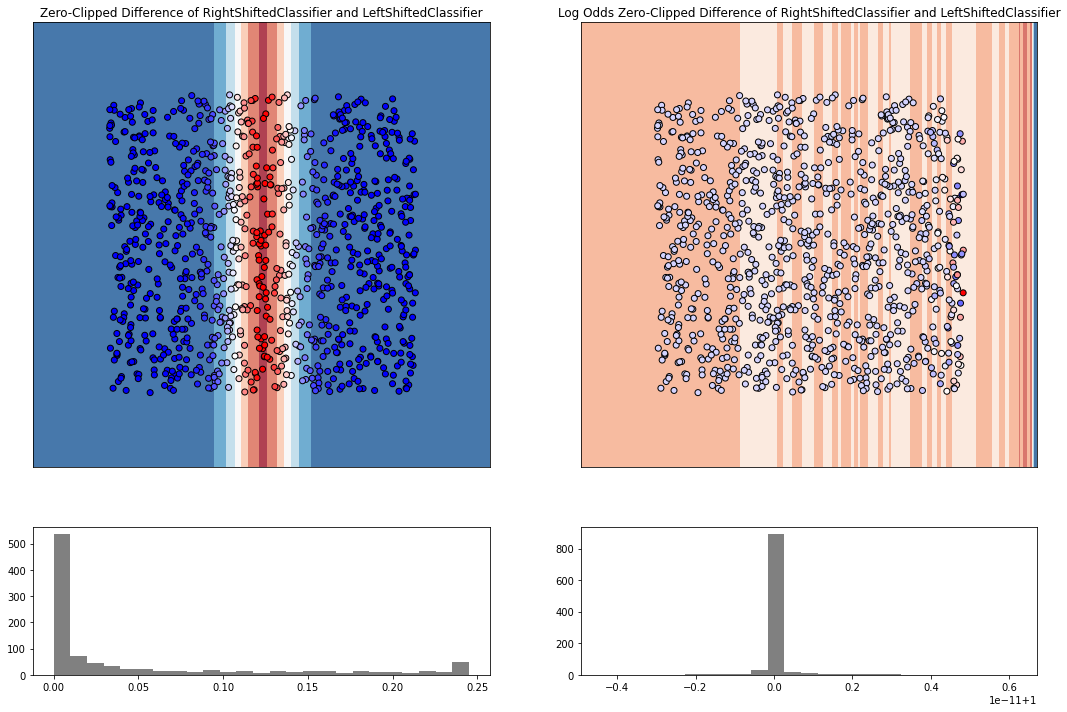

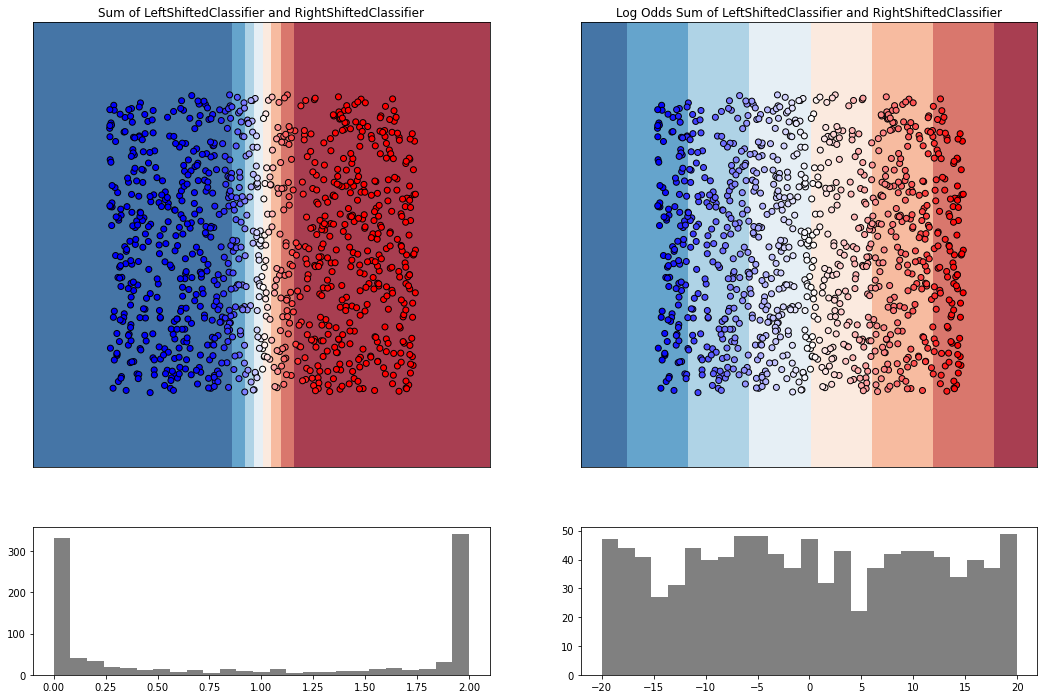

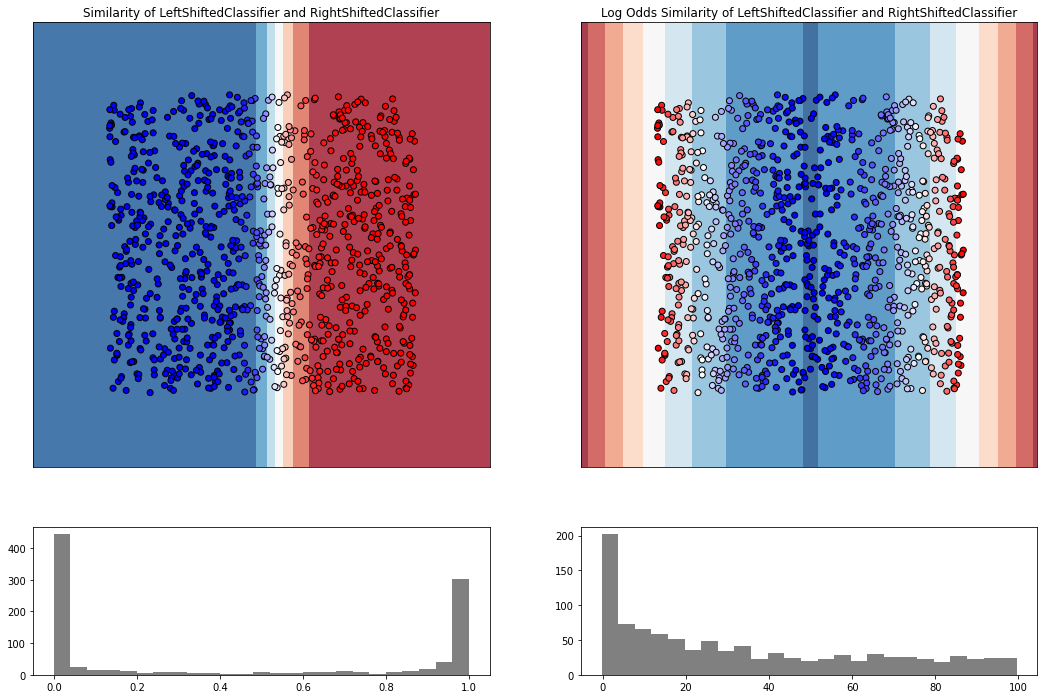

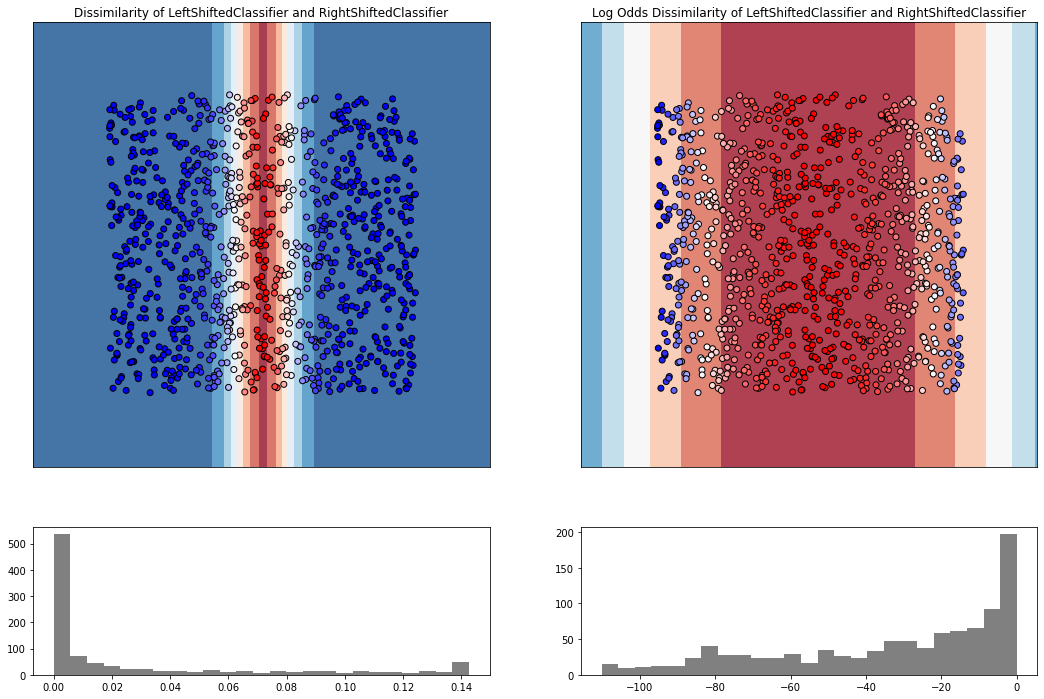

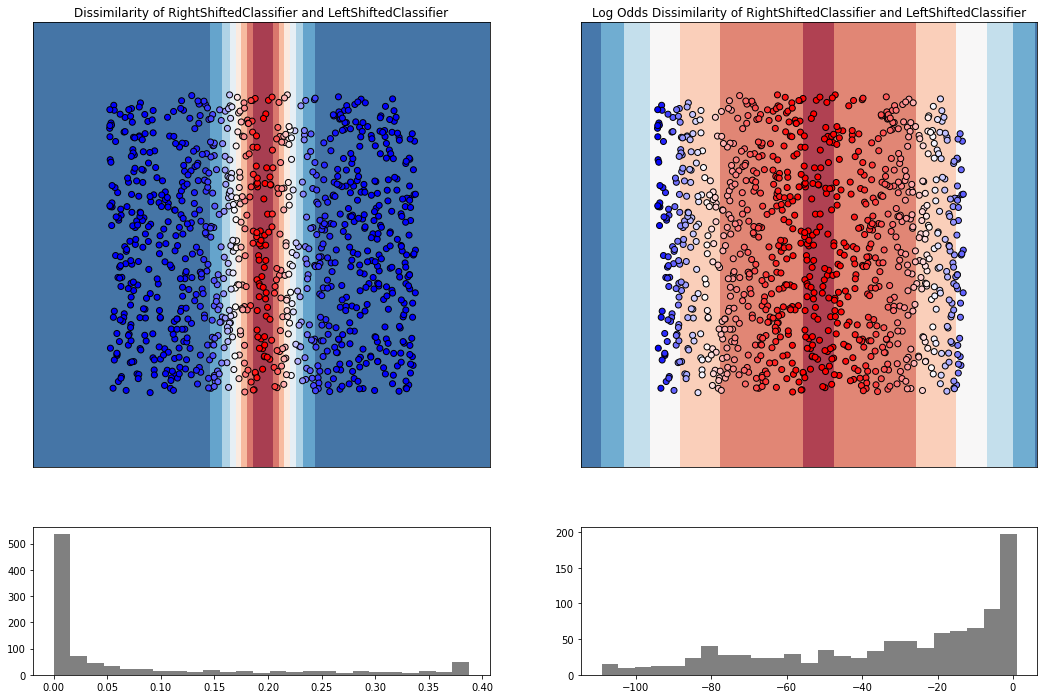

In [6]:
for comparer in comparers:
    plot_decision_boundaries_and_distributions(comparer, X)

## Generate Explanations

In [7]:
SHAPExplainer.group_name = notebook_name

probability_single_model_explainers = [
    make_shap_explainer(str(classifier), classifier.predict_proba, X, feature_names=feature_names)
    for classifier in classifiers]
log_odds_single_model_explainers = [
    make_shap_explainer(str(classifier) + ' Log Odds', classifier.predict_log_odds, X, feature_names=feature_names)
    for classifier in classifiers]
single_model_explainers = probability_single_model_explainers + log_odds_single_model_explainers

probability_comparison_explainers = [
    make_shap_explainer(str(comparer), comparer.predict_proba, X, feature_names=feature_names)
    for comparer in comparers]
log_odds_comparison_explainers = [
    make_shap_explainer(str(comparer) + ' Log Odds', comparer.predict_log_odds, X, feature_names=feature_names)
    for comparer in comparers]
comparison_explainers = probability_comparison_explainers + log_odds_comparison_explainers

explainers = single_model_explainers + comparison_explainers

Exact explainer: 1001it [00:26, 28.02it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/LeftShiftedClassifier.exp (0:00:26.948879)


Exact explainer: 1001it [00:20, 25.30it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/RightShiftedClassifier.exp (0:00:20.242297)


Exact explainer: 1001it [00:18, 24.00it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/LeftShiftedClassifier Log Odds.exp (0:00:18.914017)


Exact explainer: 1001it [00:19, 24.09it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/RightShiftedClassifier Log Odds.exp (0:00:19.177822)


Exact explainer: 1001it [00:37, 18.77it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Difference of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:37.698736)


Exact explainer: 1001it [00:38, 18.67it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/Absolute Difference of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:38.601263)


Exact explainer: 1001it [00:38, 18.96it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Zero-Clipped Difference of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:38.280182)


Exact explainer: 1001it [00:43, 16.45it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/Zero-Clipped Difference of RightShiftedClassifier and LeftShiftedClassifier.exp (0:00:44.003355)


Exact explainer: 1001it [00:33, 20.65it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Sum of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:33.400346)


Exact explainer: 1001it [00:32, 20.92it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Similarity of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:32.629858)


Exact explainer: 1001it [00:32, 21.13it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Dissimilarity of LeftShiftedClassifier and RightShiftedClassifier.exp (0:00:32.126650)


Exact explainer: 1001it [00:32, 21.17it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/Dissimilarity of RightShiftedClassifier and LeftShiftedClassifier.exp (0:00:32.291887)


Exact explainer: 1001it [00:32, 21.03it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Difference of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.461350)


Exact explainer: 1001it [00:32, 21.11it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Absolute Difference of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.474521)


Exact explainer: 1001it [00:32, 20.94it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Zero-Clipped Difference of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.698478)


Exact explainer: 1001it [00:32, 20.90it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Zero-Clipped Difference of RightShiftedClassifier and LeftShiftedClassifier Log Odds.exp (0:00:32.678644)


Exact explainer: 1001it [00:32, 21.06it/s]                          


Finished generating: explanations/Move Soft Decision Boundary/Sum of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.319280)


Exact explainer: 1001it [00:32, 21.06it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Similarity of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.471459)


Exact explainer: 1001it [00:32, 20.93it/s]                         


Finished generating: explanations/Move Soft Decision Boundary/Dissimilarity of LeftShiftedClassifier and RightShiftedClassifier Log Odds.exp (0:00:32.577823)


Exact explainer: 1001it [00:33, 21.32it/s]                         

Finished generating: explanations/Move Soft Decision Boundary/Dissimilarity of RightShiftedClassifier and LeftShiftedClassifier Log Odds.exp (0:00:33.614954)


## Analyze

### SHAP Value Distribution

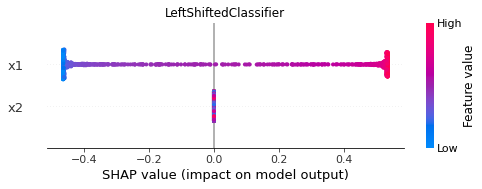

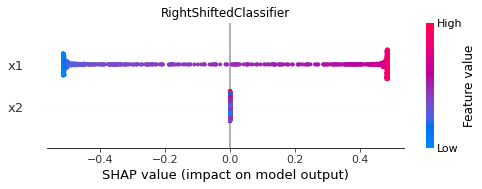

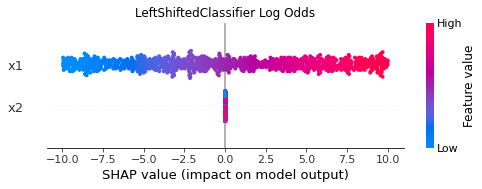

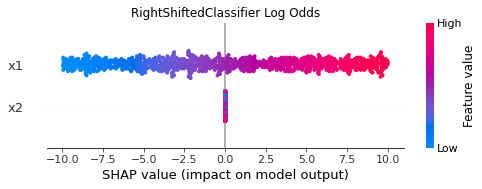

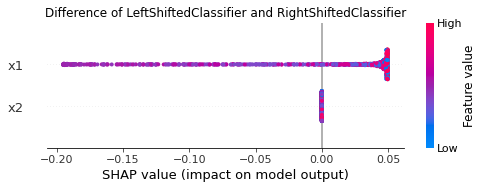

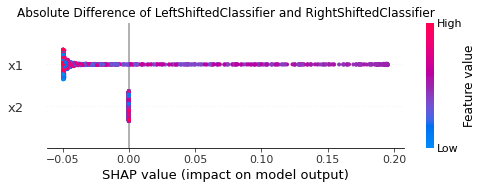

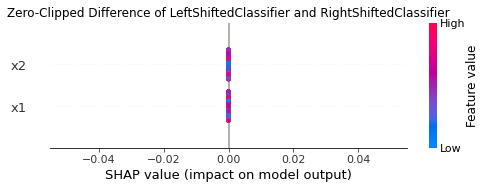

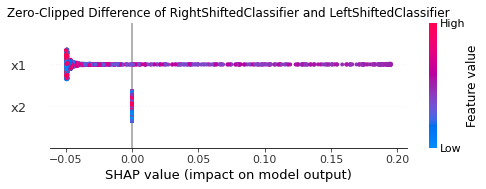

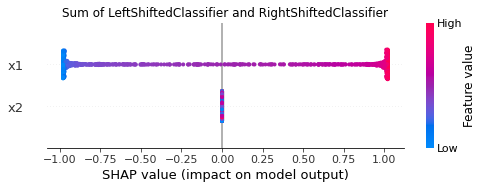

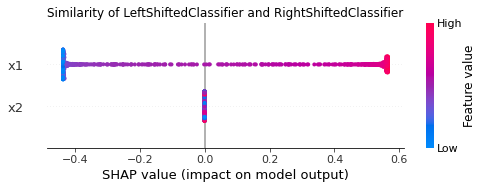

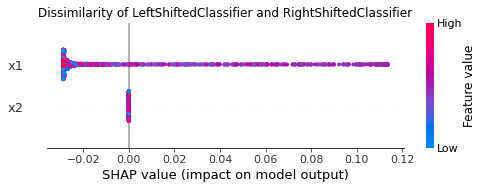

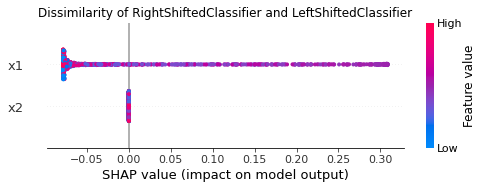

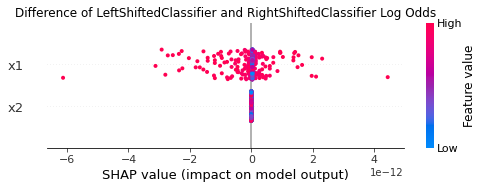

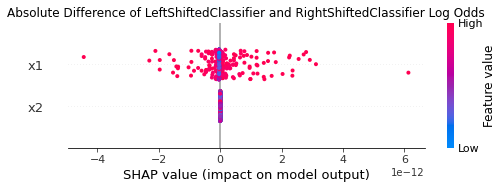

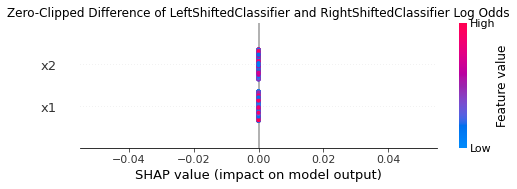

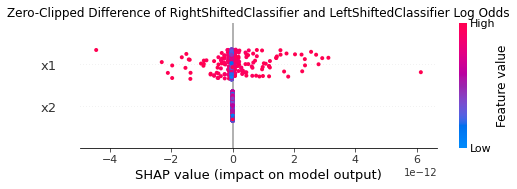

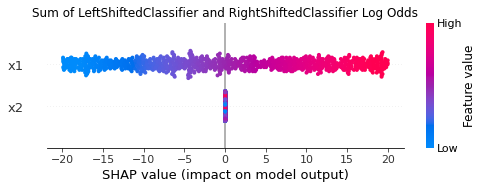

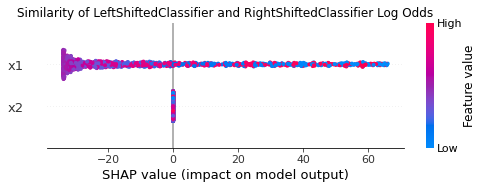

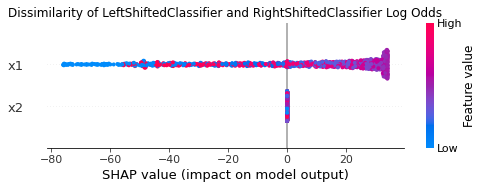

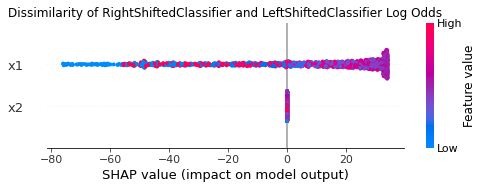

In [8]:
for explainer in explainers:
    plot_shap_value_distribution(explainer)

### Features' Partial Dependence Plots

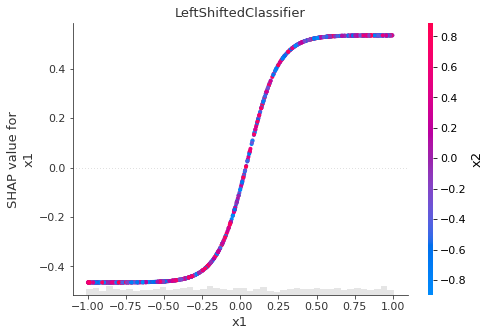

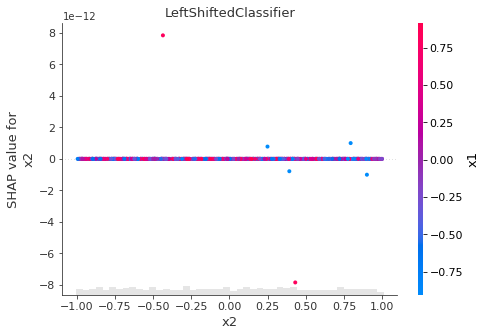

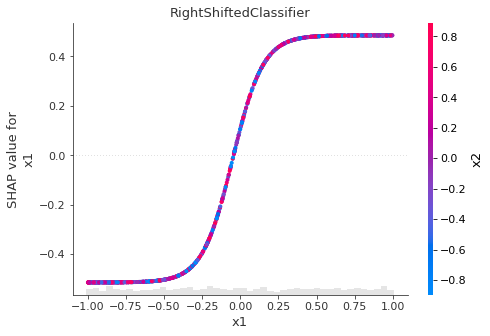

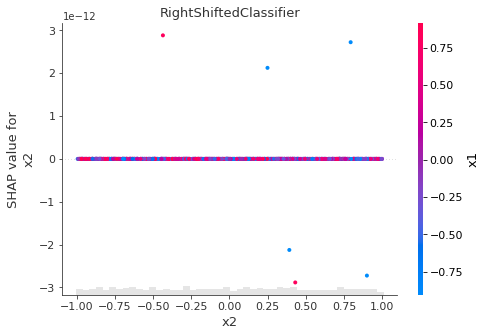

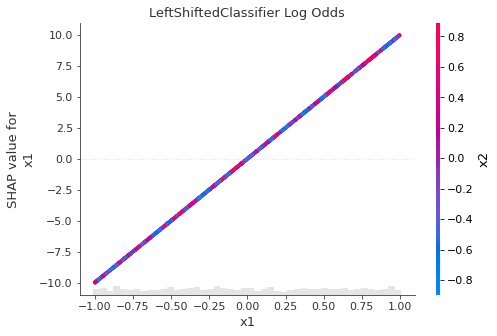

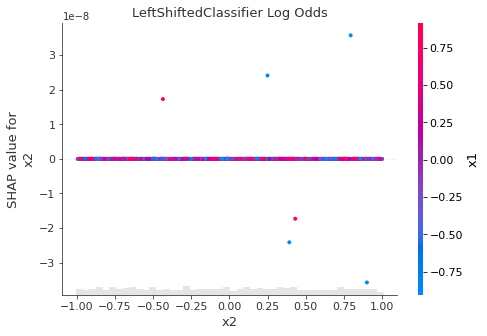

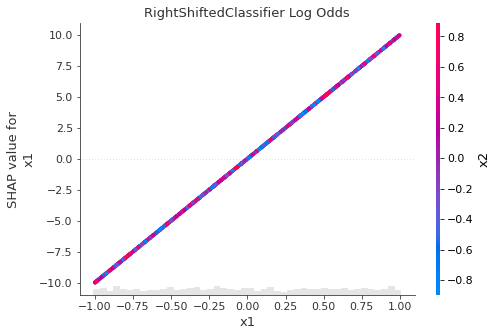

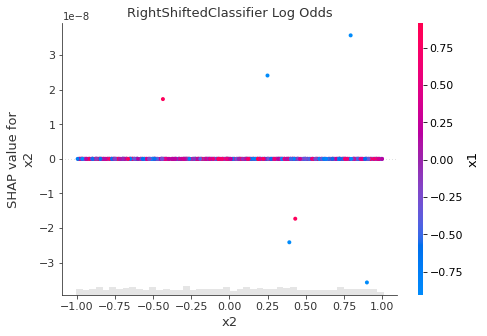

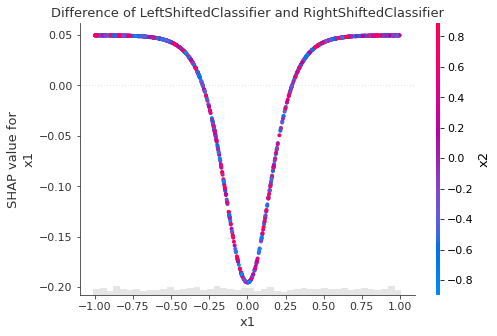

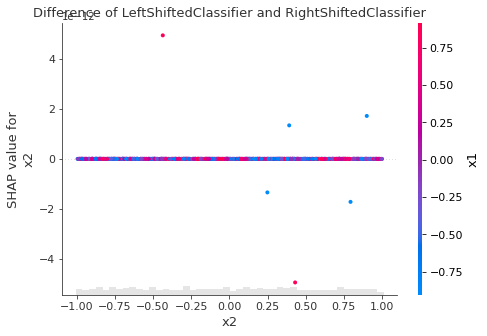

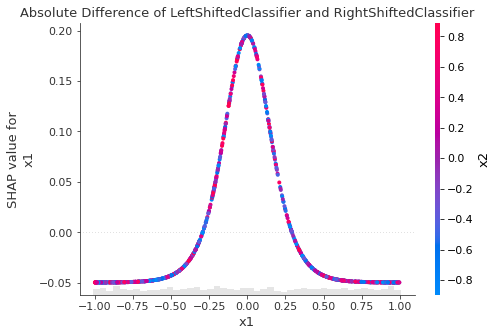

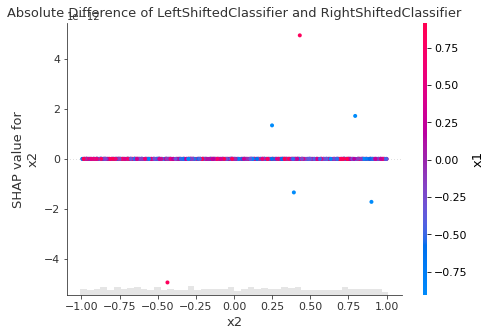

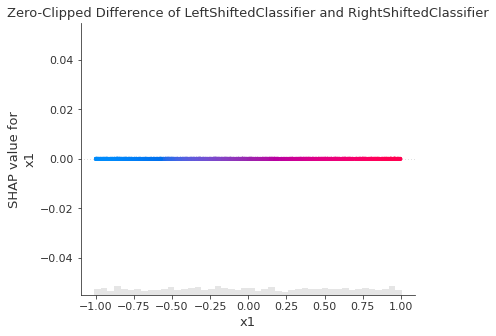

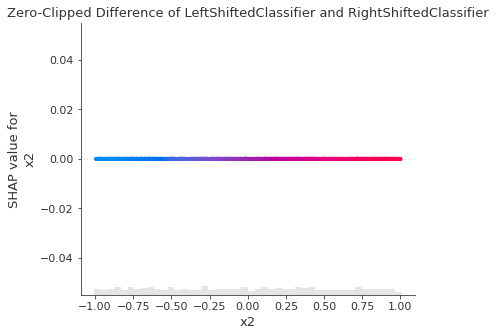

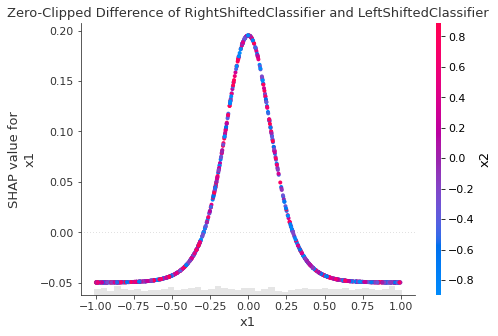

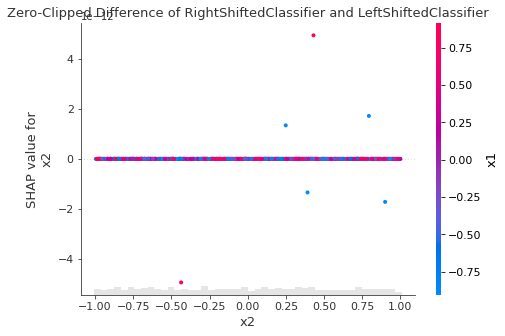

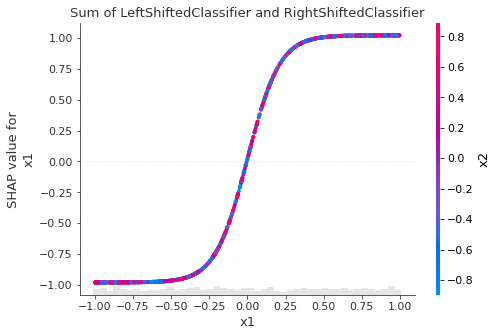

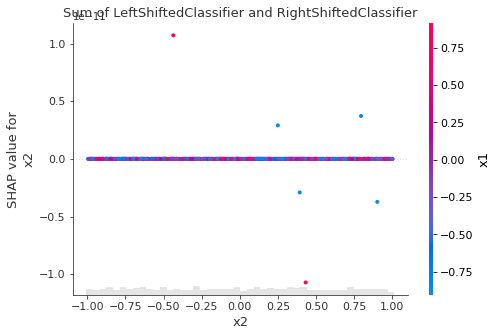

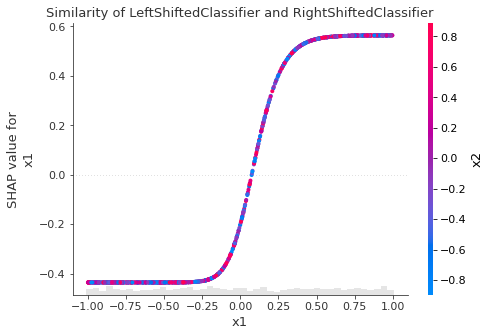

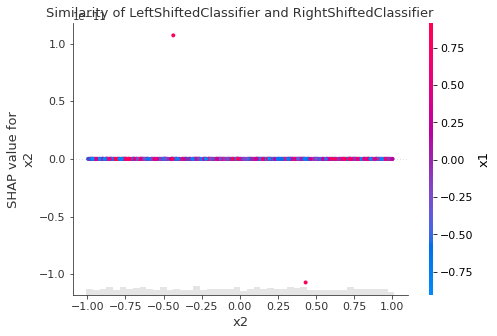

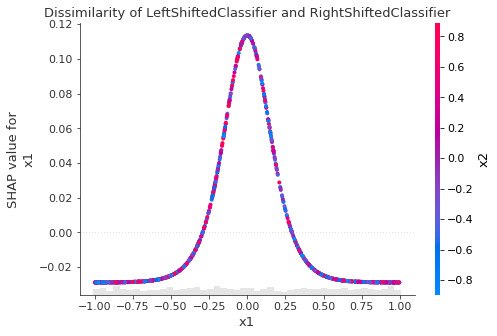

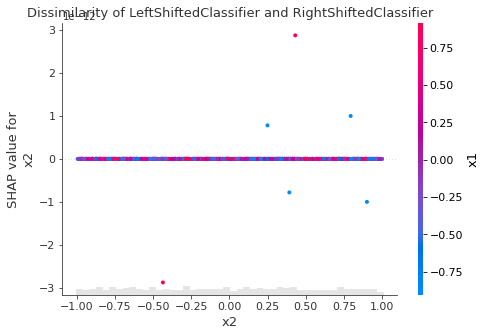

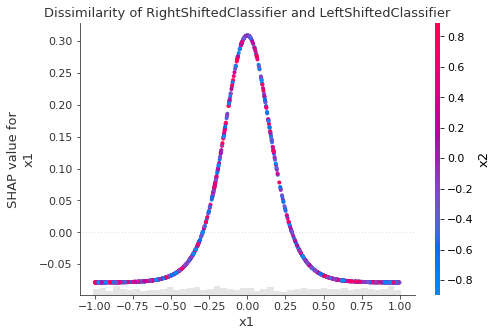

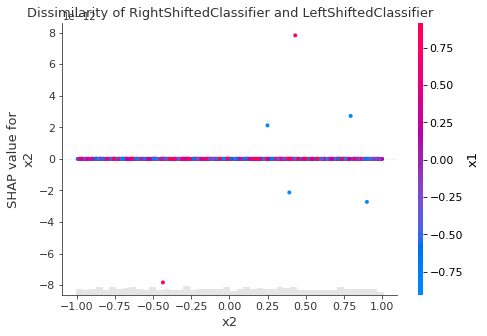

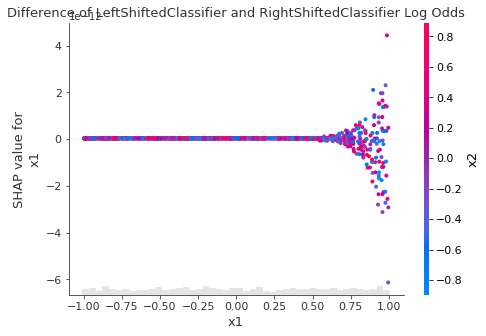

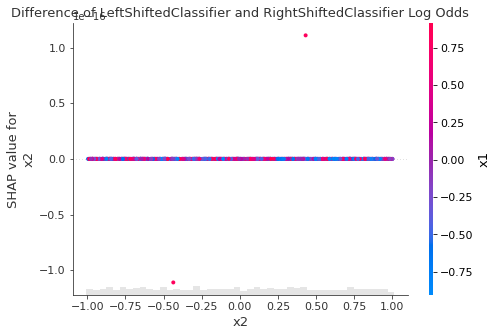

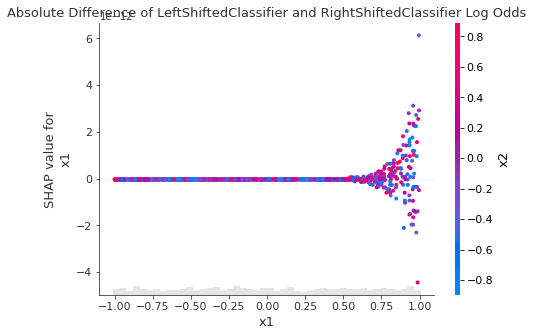

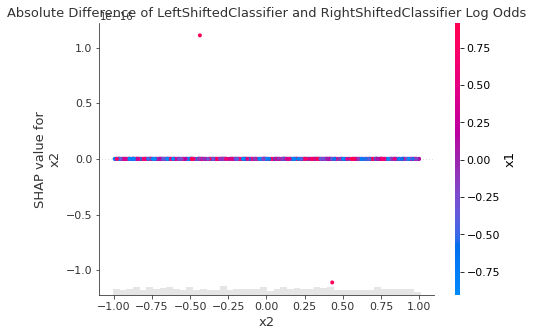

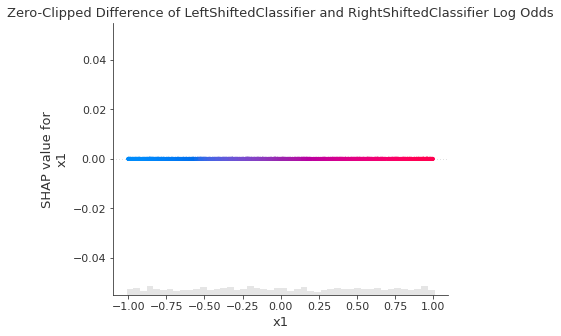

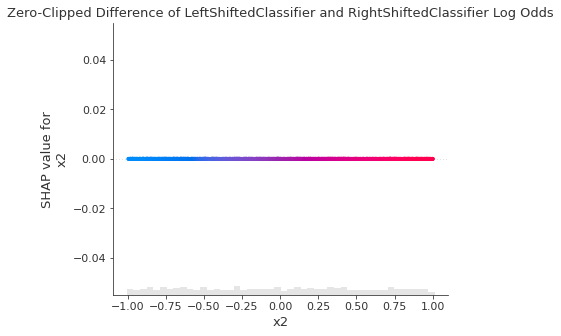

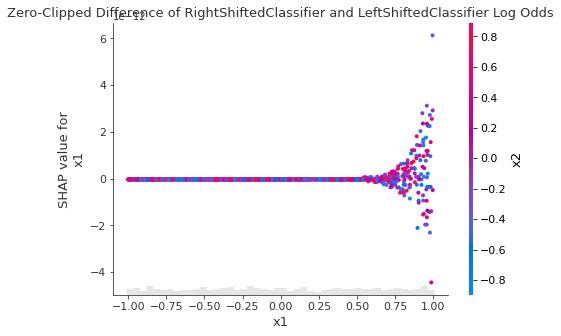

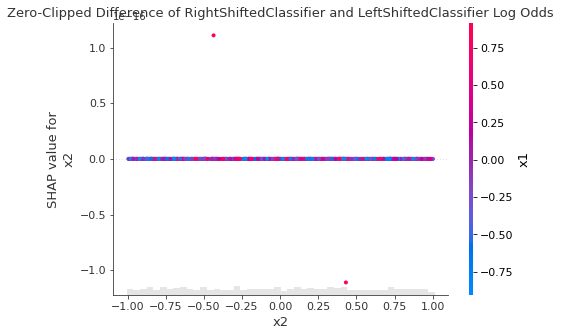

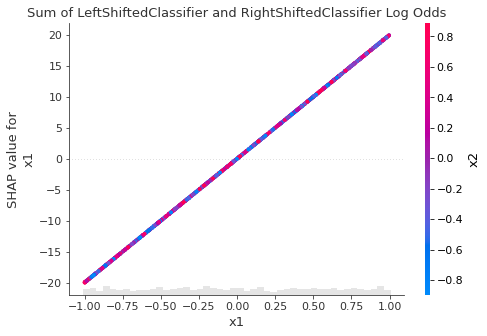

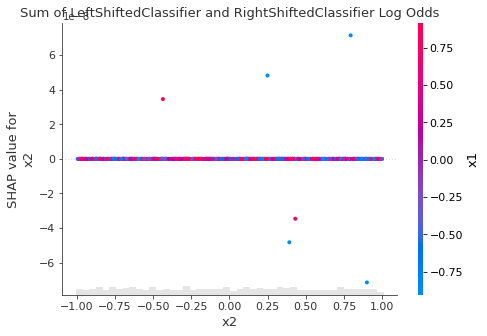

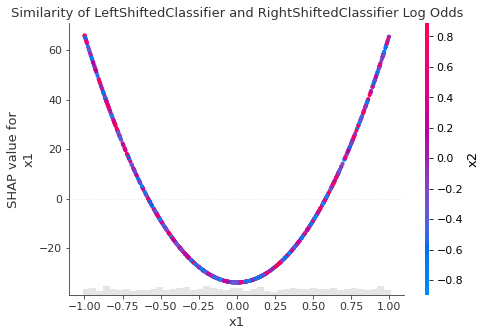

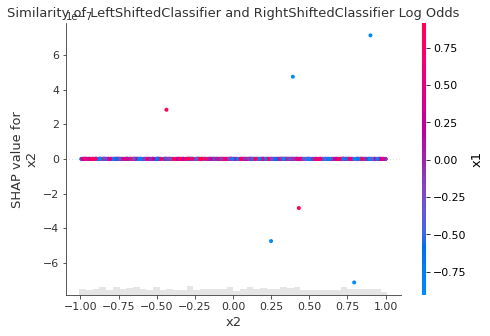

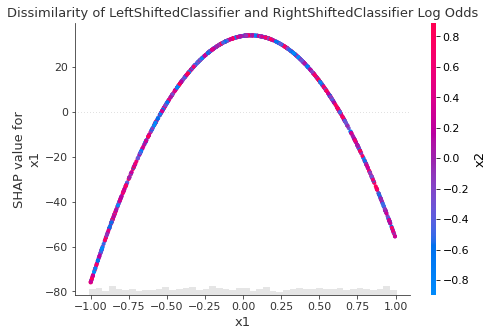

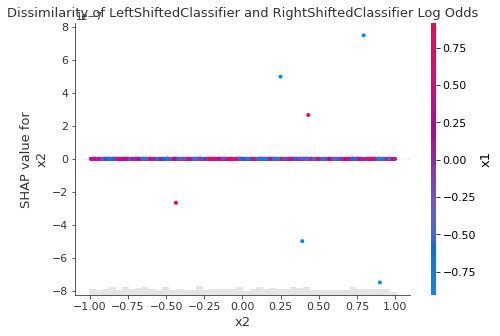

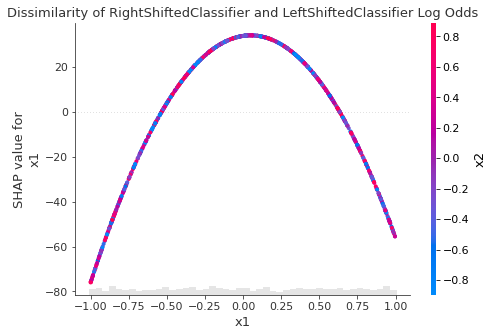

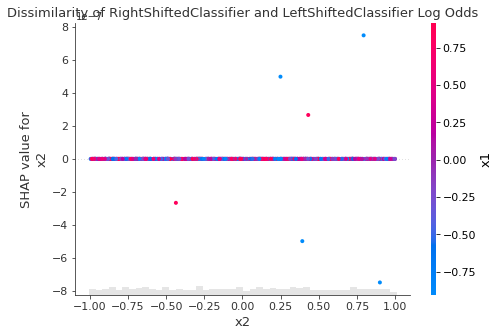

In [9]:
for explainer in explainers:
    plot_shap_partial_dependence(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

In [10]:
plot_shap_values_stacked(*probability_single_model_explainers)
plot_shap_values_stacked(*log_odds_single_model_explainers)

for explainer in comparison_explainers:
    plot_shap_values_stacked(explainer)

### Hierarchically Clustered SHAP Values

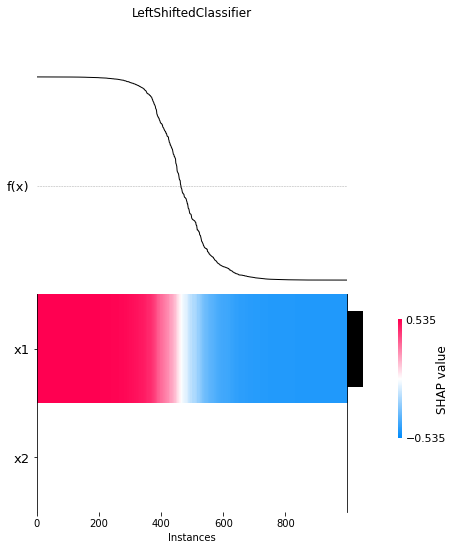

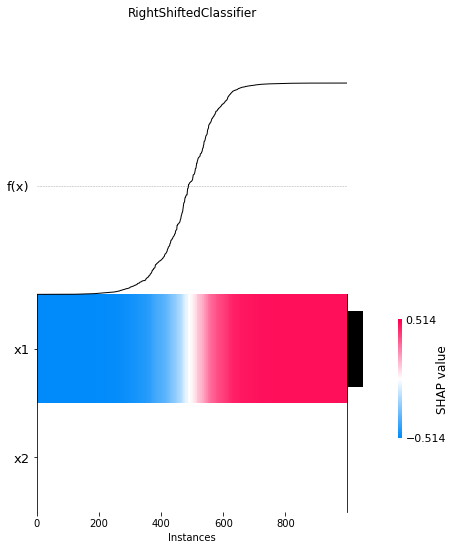

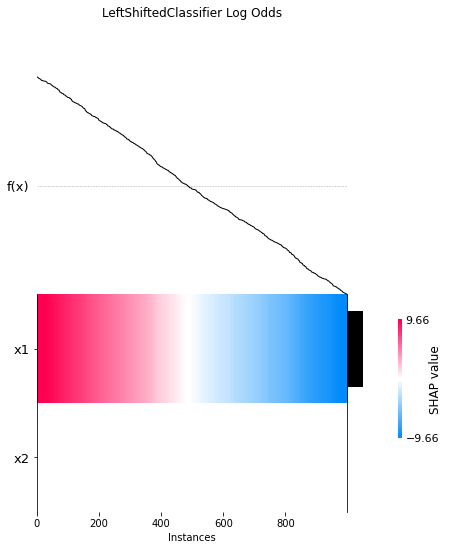

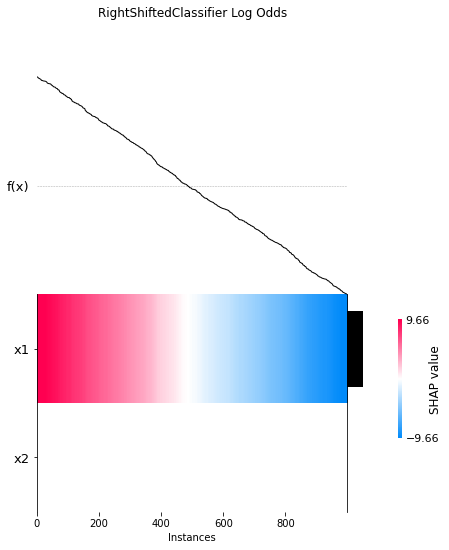

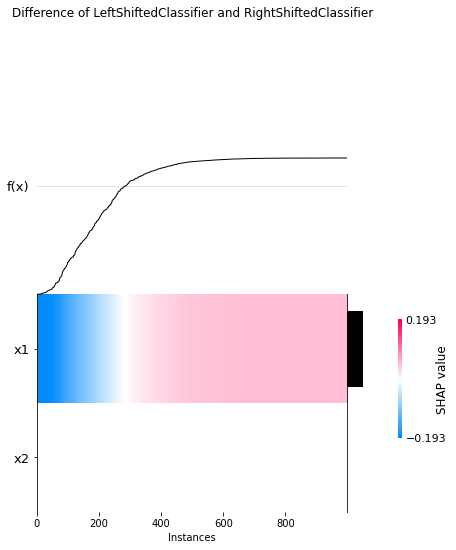

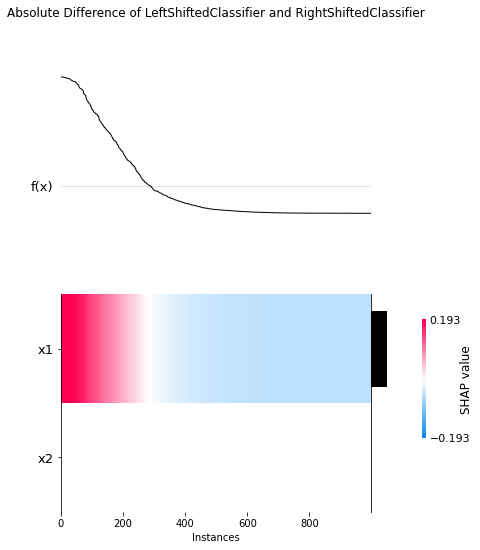

invalid value encountered in true_divide
invalid value encountered in true_divide


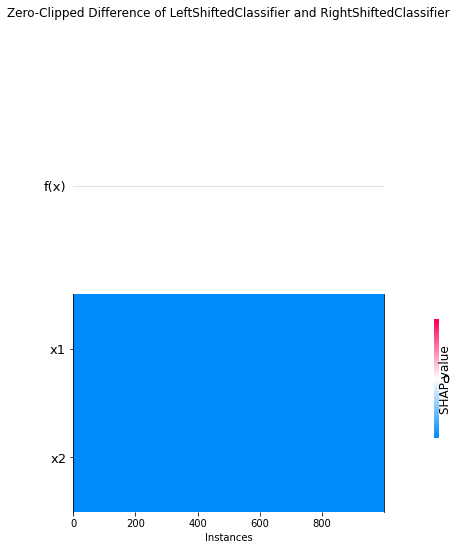

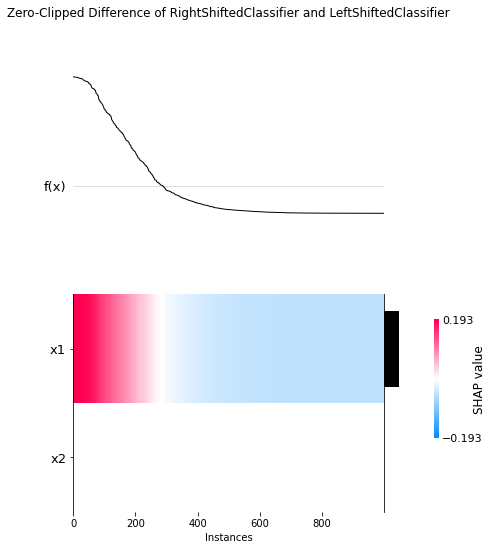

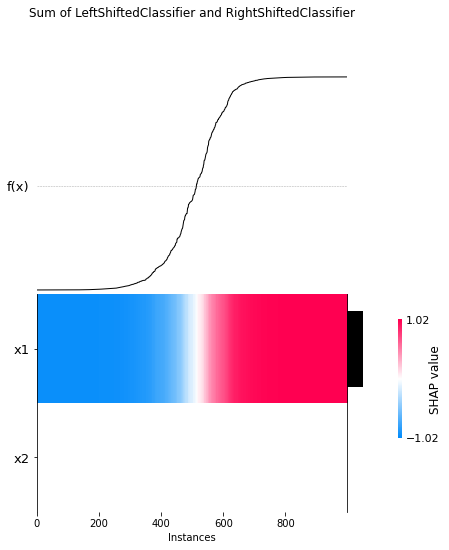

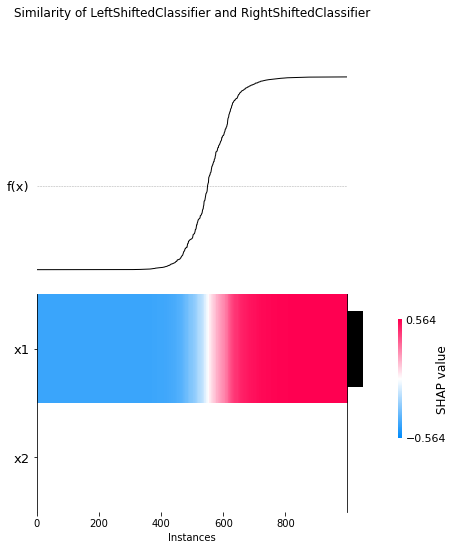

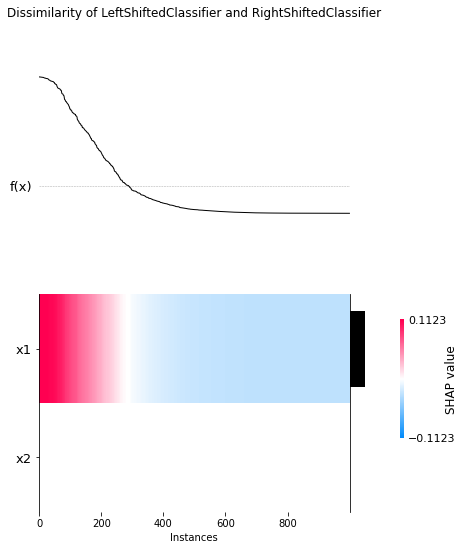

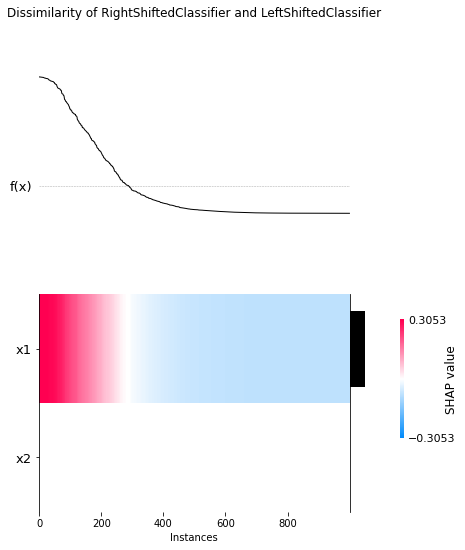

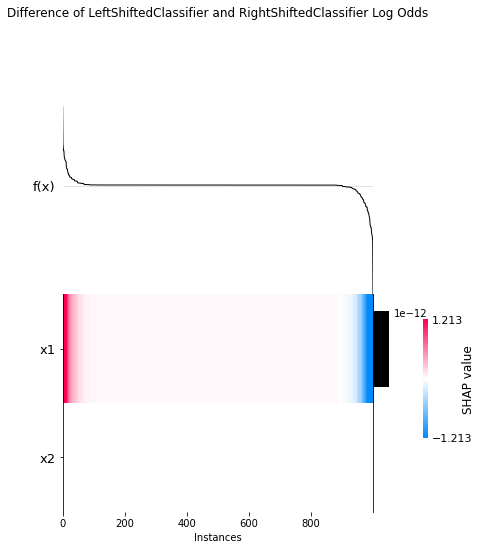

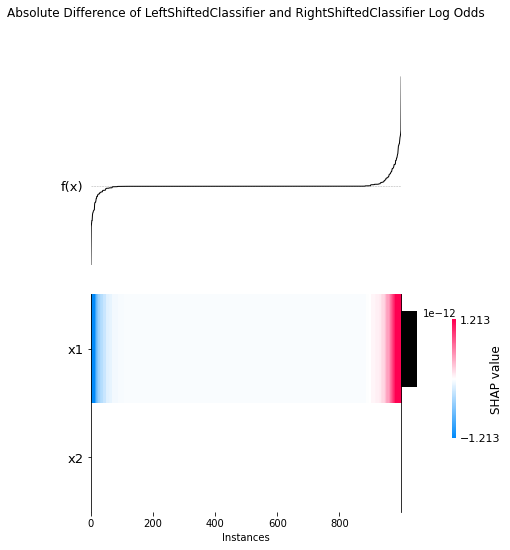

invalid value encountered in true_divide
invalid value encountered in true_divide


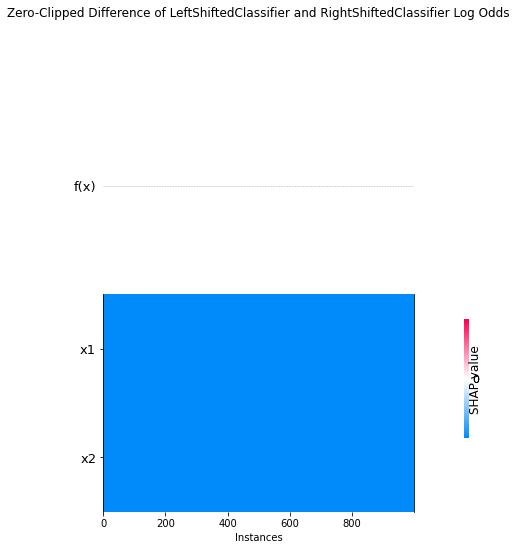

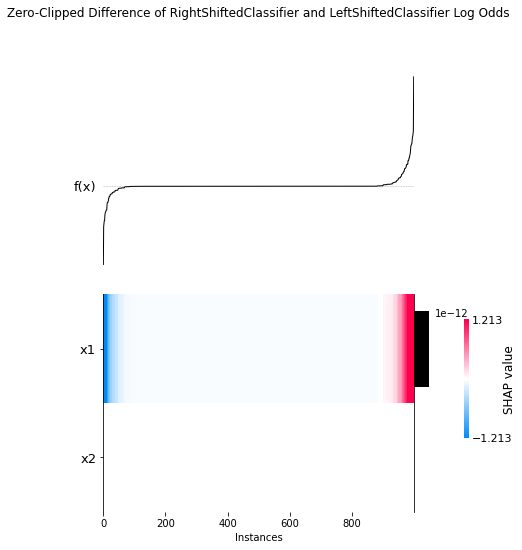

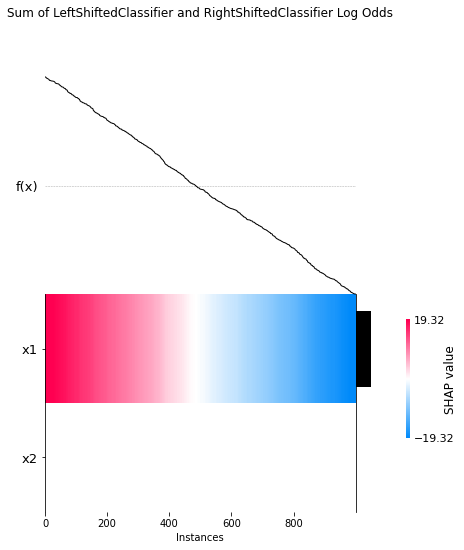

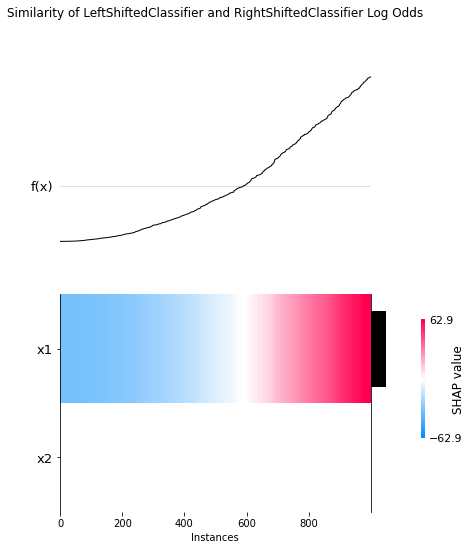

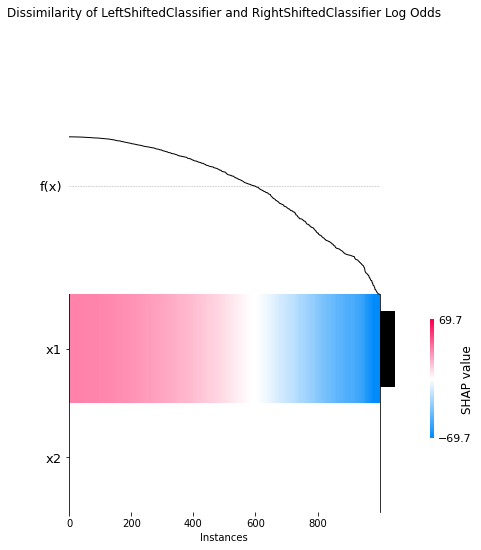

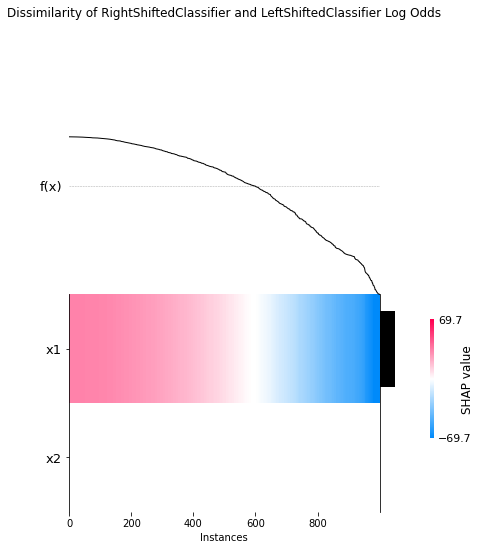

In [11]:
for explainer in explainers:
    plot_shap_values_hierarchically_clustered(explainer)
